In [7]:
!pip install git+https://github.com/PyFstat/PyFstat@python37

  Cloning https://github.com/PyFstat/PyFstat (to revision python37) to /tmp/pip-req-build-ea4hkfgb
  Running command git clone --filter=blob:none --quiet https://github.com/PyFstat/PyFstat /tmp/pip-req-build-ea4hkfgb
  Running command git checkout -b python37 --track origin/python37
  Switched to a new branch 'python37'
  Branch 'python37' set up to track remote branch 'python37' from 'origin'.
  Resolved https://github.com/PyFstat/PyFstat to commit 73ad1acdc9385a234727abf3eb9f93c9298fc5e5
  Preparing metadata (setup.py) ... done


In [8]:
import numpy as np
import h5py
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
import cv2

import pyfstat
from pyfstat.utils import get_sft_as_arrays

logger = pyfstat.set_up_logger(label="1_generating_signals", log_level="INFO")

%matplotlib inline

In [9]:
!rm -rf train_samples
!mkdir -p train_samples/signal/H1
!mkdir -p train_samples/signal/L1

23-01-03 05:48:43.314 pyfstat.core INFO    : Creating Writer object...
23-01-03 05:48:43.316 pyfstat.utils.ephemeris INFO    : No /root/.pyfstat.conf file found. Will fall back to lal's automatic path resolution for files [earth00-40-DE405.dat.gz,sun00-40-DE405.dat.gz]. Alternatively, set 'earth_ephem' and 'sun_ephem' class options.
23-01-03 05:48:43.318 pyfstat.make_sfts INFO    : Generating SFTs with fmin=99.9, Band=0.2
23-01-03 05:48:43.319 pyfstat.make_sfts INFO    : Checking if we can re-use injection config file...
23-01-03 05:48:43.319 pyfstat.make_sfts INFO    : ...OK: config file ./PyFstat.cff already exists.
23-01-03 05:48:43.320 pyfstat.make_sfts INFO    : ...file contents unmatched, updating ./PyFstat.cff.
23-01-03 05:48:43.321 pyfstat.make_sfts INFO    : Writing config file: ./PyFstat.cff
23-01-03 05:48:43.321 pyfstat.make_sfts INFO    : Checking if we can re-use existing SFT data file(s)...
23-01-03 05:48:43.322 pyfstat.make_sfts INFO    : ...OK: file(s) found matching '.

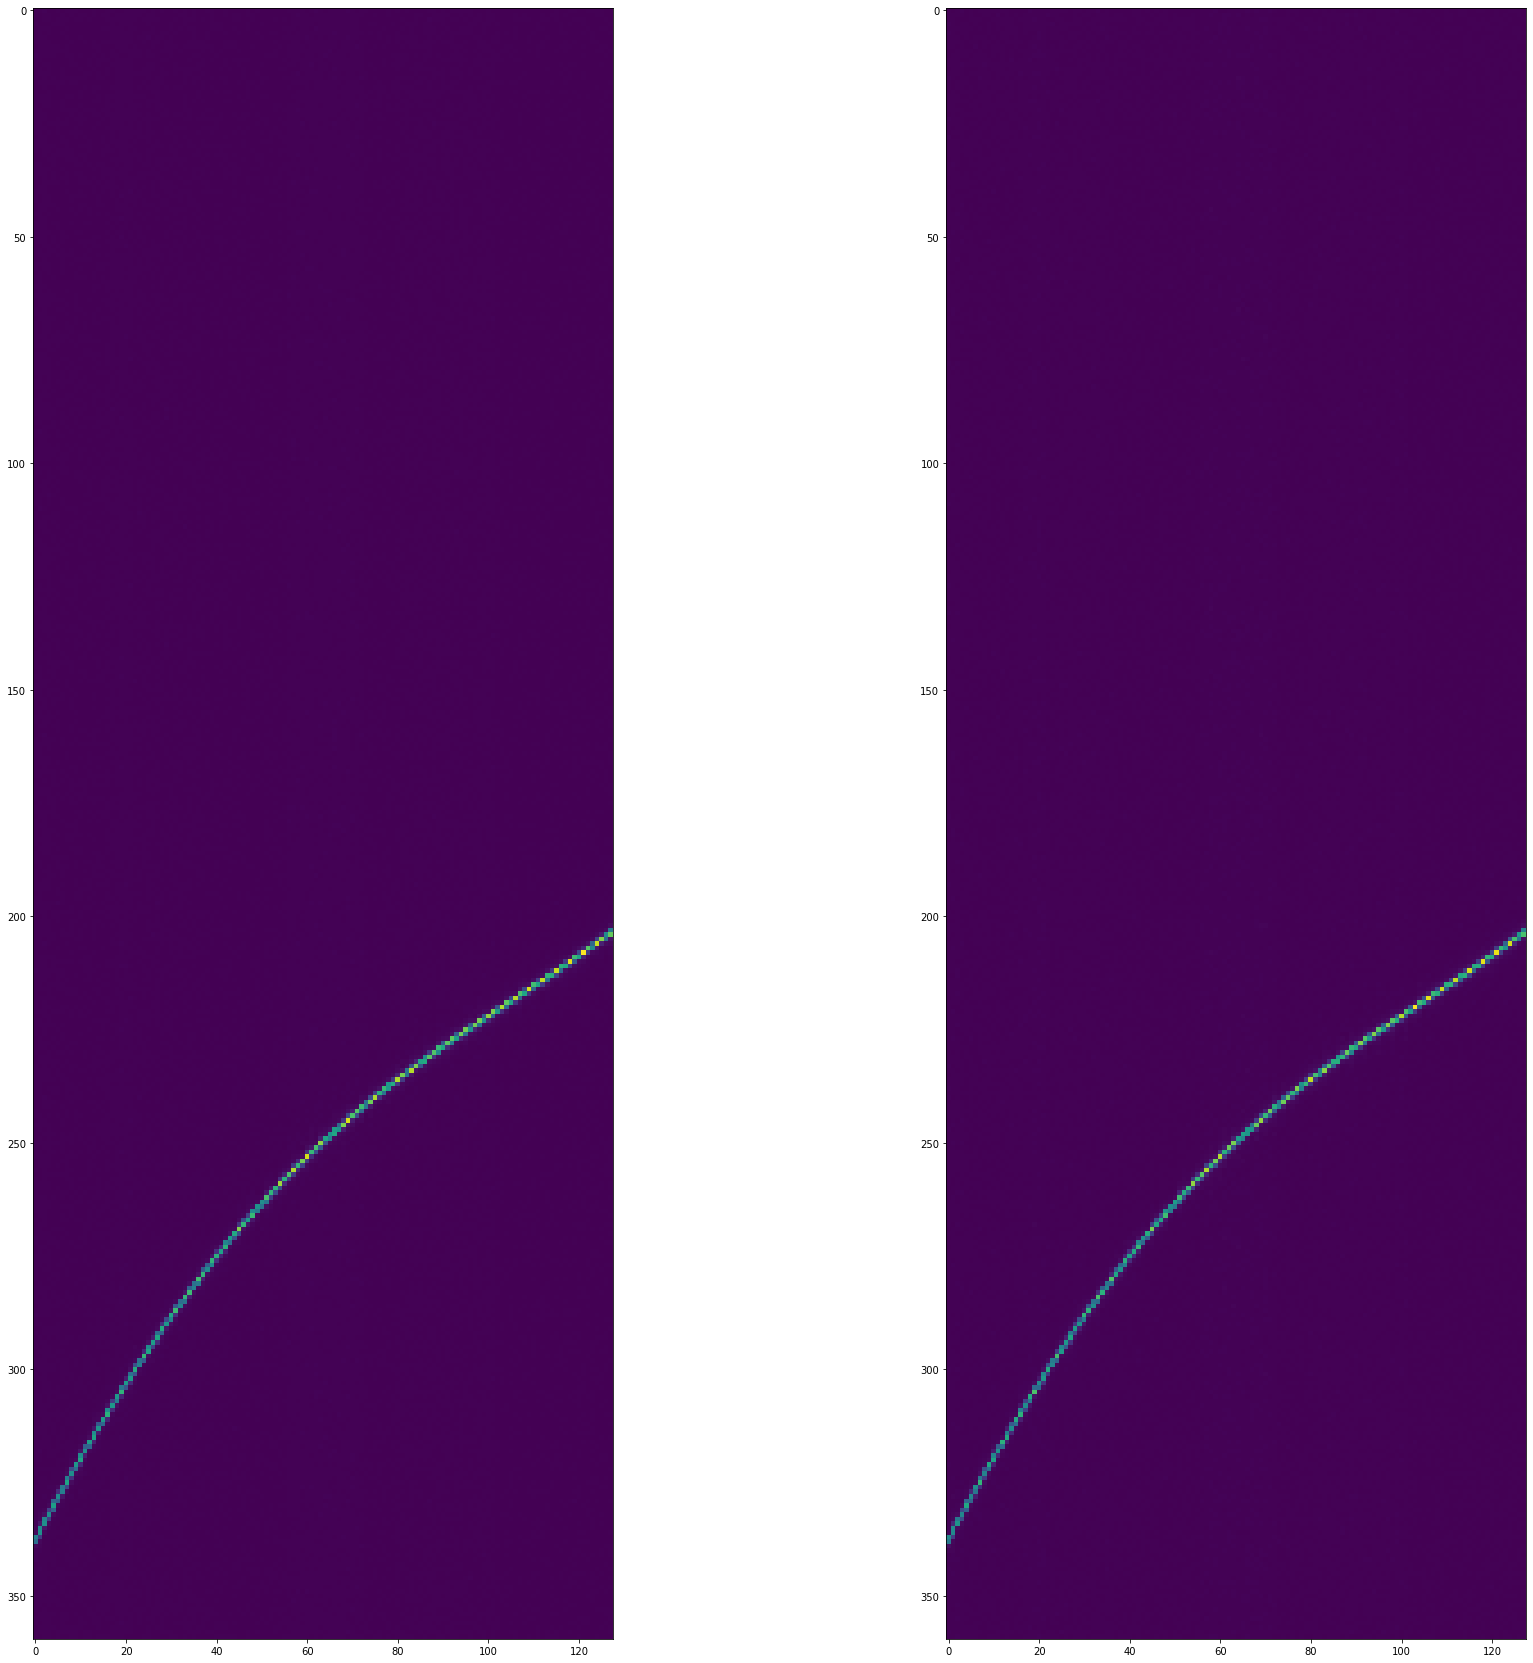

23-01-03 05:49:04.515 pyfstat.core INFO    : Creating Writer object...
23-01-03 05:49:04.517 pyfstat.utils.ephemeris INFO    : No /root/.pyfstat.conf file found. Will fall back to lal's automatic path resolution for files [earth00-40-DE405.dat.gz,sun00-40-DE405.dat.gz]. Alternatively, set 'earth_ephem' and 'sun_ephem' class options.
23-01-03 05:49:04.518 pyfstat.make_sfts INFO    : Generating SFTs with fmin=99.9, Band=0.2
23-01-03 05:49:04.519 pyfstat.make_sfts INFO    : Checking if we can re-use injection config file...
23-01-03 05:49:04.520 pyfstat.make_sfts INFO    : ...OK: config file ./PyFstat.cff already exists.
23-01-03 05:49:04.521 pyfstat.make_sfts INFO    : ...file contents unmatched, updating ./PyFstat.cff.
23-01-03 05:49:04.521 pyfstat.make_sfts INFO    : Writing config file: ./PyFstat.cff
23-01-03 05:49:04.523 pyfstat.make_sfts INFO    : Checking if we can re-use existing SFT data file(s)...
23-01-03 05:49:04.524 pyfstat.make_sfts INFO    : ...OK: file(s) found matching '.

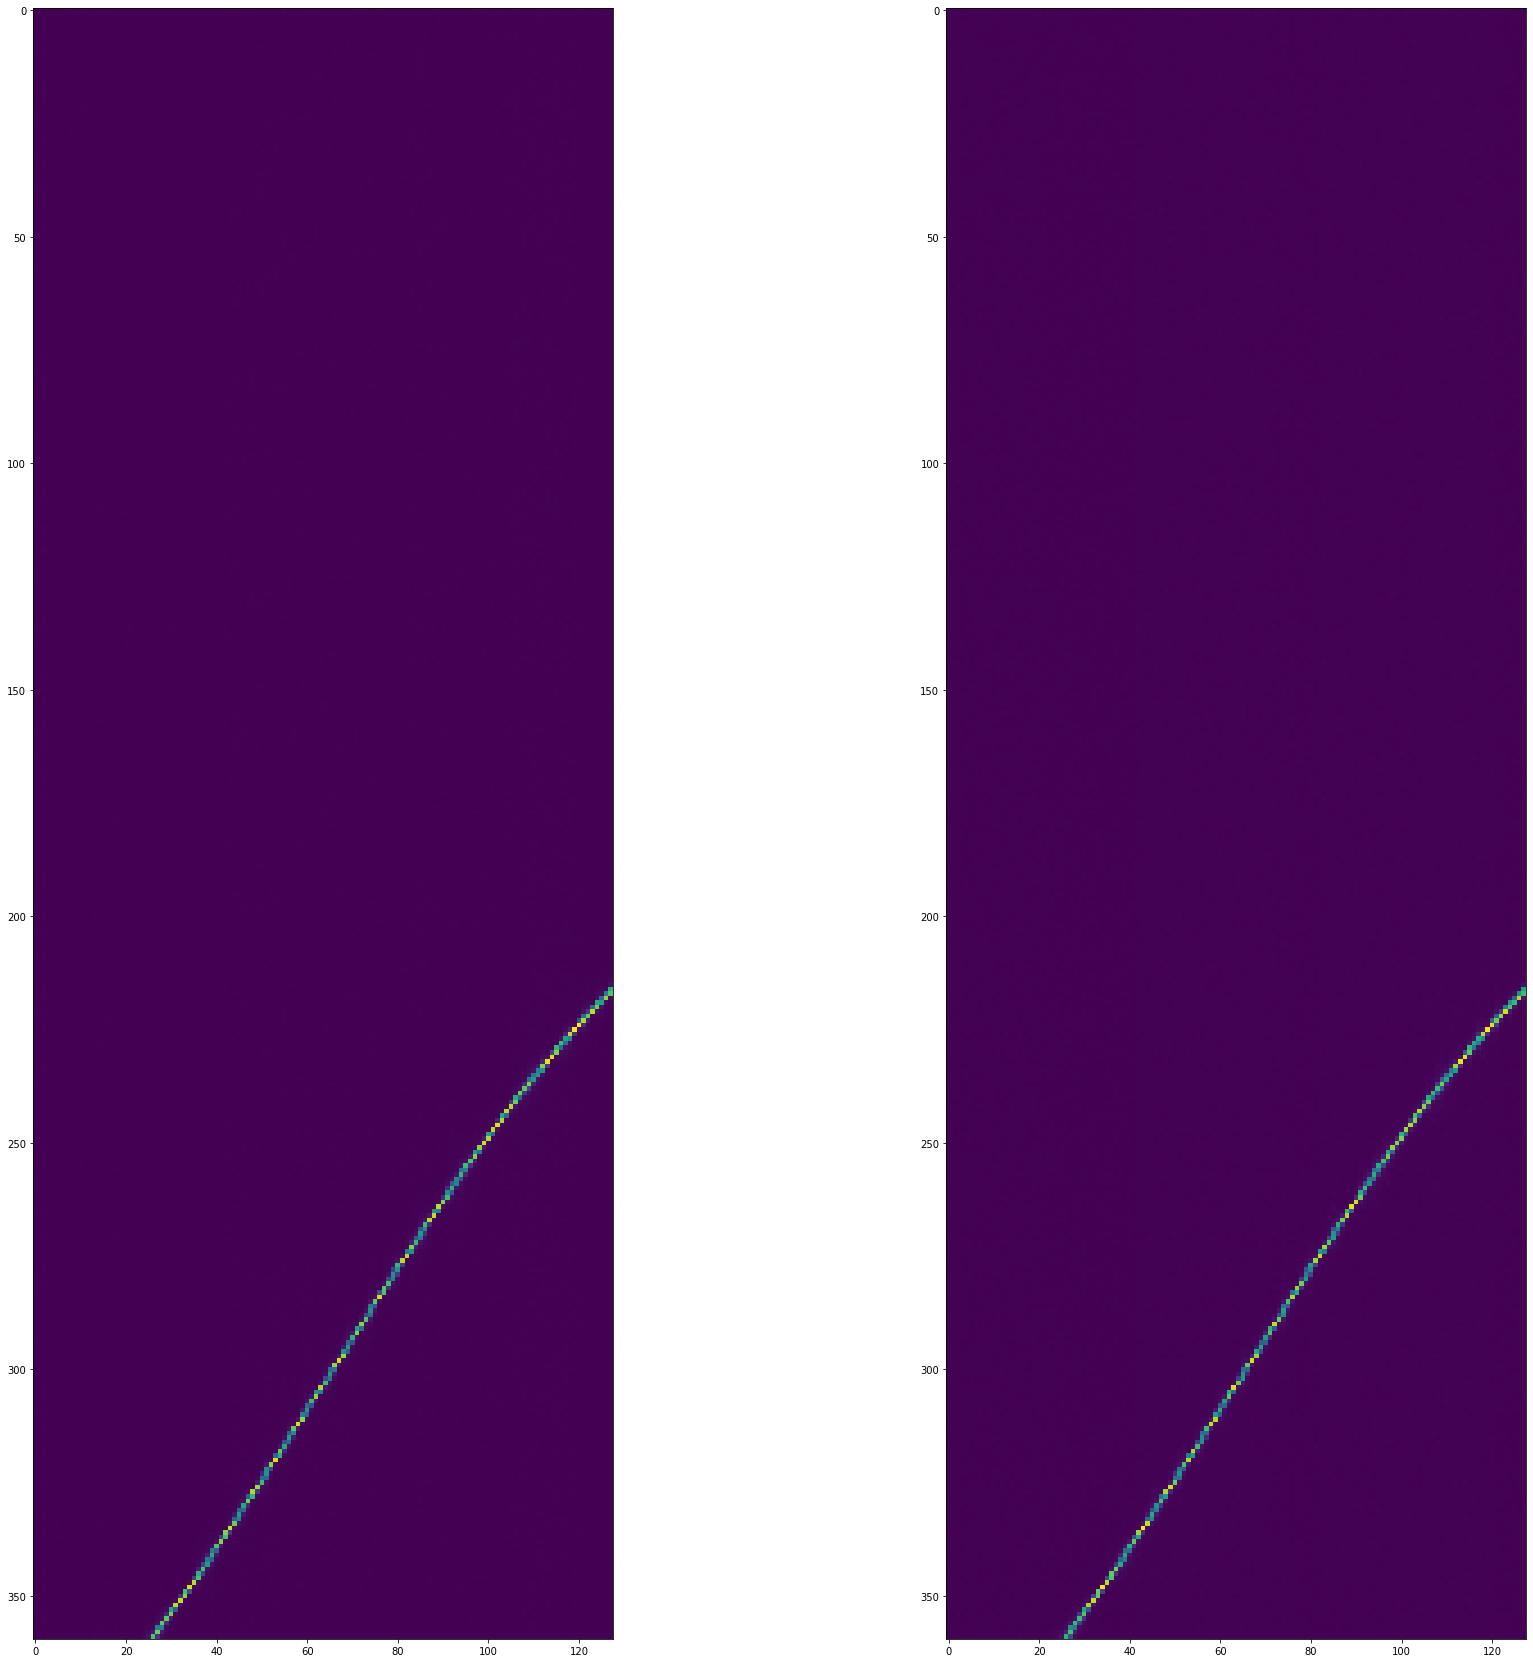

23-01-03 05:49:25.724 pyfstat.core INFO    : Creating Writer object...
23-01-03 05:49:25.725 pyfstat.utils.ephemeris INFO    : No /root/.pyfstat.conf file found. Will fall back to lal's automatic path resolution for files [earth00-40-DE405.dat.gz,sun00-40-DE405.dat.gz]. Alternatively, set 'earth_ephem' and 'sun_ephem' class options.
23-01-03 05:49:25.726 pyfstat.make_sfts INFO    : Generating SFTs with fmin=99.9, Band=0.2
23-01-03 05:49:25.727 pyfstat.make_sfts INFO    : Checking if we can re-use injection config file...
23-01-03 05:49:25.727 pyfstat.make_sfts INFO    : ...OK: config file ./PyFstat.cff already exists.
23-01-03 05:49:25.728 pyfstat.make_sfts INFO    : ...file contents unmatched, updating ./PyFstat.cff.
23-01-03 05:49:25.729 pyfstat.make_sfts INFO    : Writing config file: ./PyFstat.cff
23-01-03 05:49:25.729 pyfstat.make_sfts INFO    : Checking if we can re-use existing SFT data file(s)...
23-01-03 05:49:25.730 pyfstat.make_sfts INFO    : ...OK: file(s) found matching '.

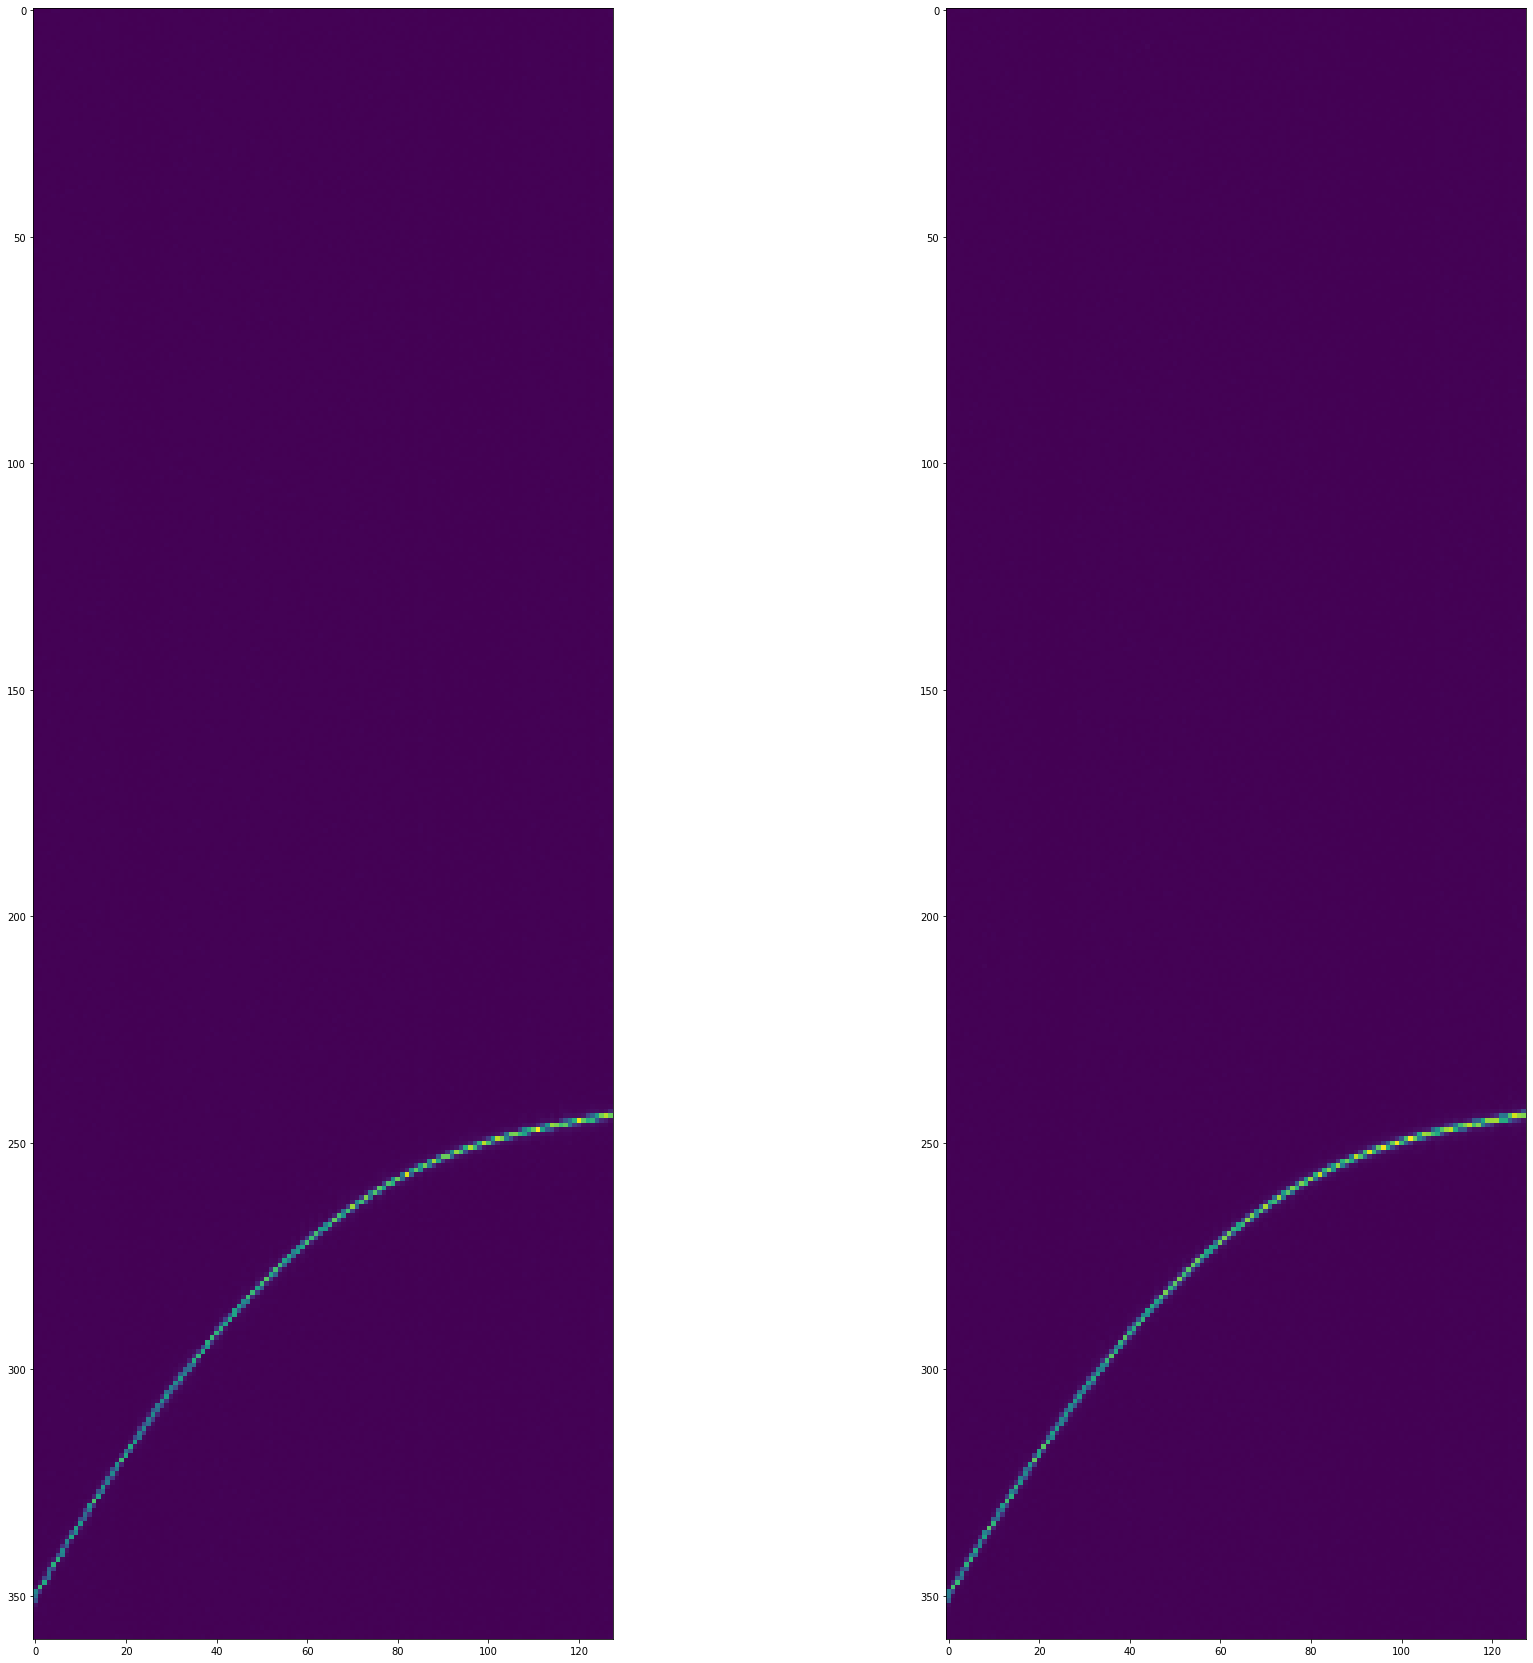

In [33]:
count = 400
nu = 309000

for i in range(count):
    try:
        segment_lengths = [3 * 86400, 3 * 86400, 3 * 86400, 4 * 86400, 4 * 86400, 4 * 86400, 5 * 86400, 5 * 86400, 10 * 86400, 10 * 86400, 15 * 86400, 17 * 86400, 18 * 86400, 25 * 86400, 20 * 86400, 20 * 86400, 25 * 86400, 21 * 86400, 2 * 86400, 2 * 86400]
        # segment_sqrtSX = [1e-23, 1e-23, 1e-23, 1e-23, 1e-23, 1.1e-23, 1.1e-23, 1.1e-23, 1.1e-23, 1.2e-23]
        segment_sqrtSX = [1e-23, 1.02e-23, 1.04e-23, 1.06e-23, 1.08e-23, 1.1e-23, 1.12e-23, 1.14e-23, 1.16e-23, 1.18e-23]

        random.shuffle(segment_lengths)

        sft_path = []

        # Setup Writer
        writer_kwargs = {
            # "outdir": "PyFstat_example_data",
            "tstart": 1238166018,
            "detectors": "H1,L1",  # Detector to simulate, in this case LIGO Hanford
            "F0": 100.0, # np.random.uniform(0, 360),  # Central frequency of the band to be generated [Hz]
            # "Band": 1.0,  # Frequency band-width around F0 [Hz]
            "sqrtSX": 1e-23,  # Single-sided Amplitude Spectral Density of the noise
            "Tsft": 3600,  # Fourier transform time duration
            "SFTWindowType": "tukey",
            "SFTWindowBeta": 0.01,
        }

        signal_parameters = {
                    # "F0": 0, # np.random.uniform(0, 360),
                    "F1": np.random.uniform(-4e-9, 0),
                    # "F1": -3e-9,
                    "Alpha": np.random.uniform(0, math.pi * 2),
                    "Delta": np.random.uniform(-math.pi / 2, math.pi / 2),
#                     "Alpha": math.pi,
#                     "Delta": math.pi / 2,
                    "h0": 1e-23,
                    'Band': 0.2,
                    "cosi": np.random.uniform(-1, 1),
                    "psi": np.random.uniform(-math.pi / 2, math.pi / 2),
                    "phi": np.random.uniform(0, math.pi * 2),
                    "tref": writer_kwargs["tstart"],
                }

        for segment in range(len(segment_lengths)):
            writer_kwargs["duration"] = segment_lengths[segment]
            writer_kwargs["sqrtSX"] = segment_sqrtSX[random.randint(0, 9)]

            if segment > 0:
                writer_kwargs["tstart"] += writer_kwargs["Tsft"] + segment_lengths[segment - 1]

            writer = pyfstat.Writer(**writer_kwargs, **signal_parameters)
            writer.make_data()

            sft_path.append(writer.sftfilepath)

        sft_path = ";".join(sft_path)  # Concatenate different files using ;
        frequency, timestamps, fourier_data = get_sft_as_arrays(sft_path)
        print(fourier_data['H1'].shape)

        H1 = fourier_data['H1'][:360, :4096]
        L1 = fourier_data['L1'][:360, :4096]
#         H2 = fourier_data['H1'][:360, 6000:10096]
#         L2 = fourier_data['L1'][:360, 6000:10096]

        H1 = H1.real ** 2 + H1.imag ** 2
        L1 = L1.real ** 2 + L1.imag ** 2
#         H2 = H2.real ** 2 + H2.imag ** 2
#         L2 = L2.real ** 2 + L2.imag ** 2

        H1 = H1.reshape(360, 1, 128, 32).mean(axis=(1, 3))
        H1 = (H1 - H1.min())
        H1 = H1 * (255 / H1.max())
        H1 = H1.astype(np.uint8)

        L1 = L1.reshape(360, 1, 128, 32).mean(axis=(1, 3))
        L1 = (L1 - L1.min())
        L1 = L1 * (255 / L1.max())
        L1 = L1.astype(np.uint8)

#         H2 = H2.reshape(360, 1, 128, 32).mean(axis=(1, 3))
#         H2 = (H2 - H2.min())
#         H2 = H2 * (255 / H2.max())
#         H2 = H2.astype(np.uint8)

#         L2 = L2.reshape(360, 1, 128, 32).mean(axis=(1, 3))
#         L2 = (L2 - L2.min())
#         L2 = L2 * (255 / L2.max())
#         L2 = L2.astype(np.uint8)

        cv2.imwrite(f'/kaggle/working/train_samples/signal/H1/{i+nu}.png', H1)
        cv2.imwrite(f'/kaggle/working/train_samples/signal/L1/{i+nu}.png', L1)
#         cv2.imwrite(f'/kaggle/working/train_samples/signal/H1/{i+1000+nu}.png', H2)
#         cv2.imwrite(f'/kaggle/working/train_samples/signal/L1/{i+1000+nu}.png', L2)
        
        print(i)

#         fig, axes = plt.subplots(1, 2, figsize=(30, 30))

#         axes[0].imshow(H1)
#         axes[1].imshow(L1)
#         axes[2].imshow(H2)
#         axes[3].imshow(L2)
#         plt.show();
    except:
        pass

In [11]:
# count = 3
# nu = 0

# for i in range(count):
#     try:
#         writer_kwargs = {
#         #     "label": "single_detector_gaussian_noise",
#         #     "outdir": "PyFstat_example_data",
#             "tstart": 1238166018,
#             "duration": 1800 * 48 * 220,
#             "detectors": "H1,L1",
#             "sqrtSX": 1e-23,
#             "Tsft": 1800,
#             "SFTWindowType": "tukey",
#             "SFTWindowBeta": 0.01,
#         }

#         signal_parameters = {
#             "F0": 0, # np.random.uniform(0, 360),
#             "F1": np.random.uniform(-4e-9, 0),
#             "Alpha": np.random.uniform(0, math.pi * 2),
#             "Delta": np.random.uniform(-math.pi / 2, math.pi / 2),
#             "h0": 1e-23, #  / 20,
#             'Band': 0.2,
#             "cosi": np.random.uniform(-1, 1),
#             "psi": np.random.uniform(-math.pi / 2, math.pi / 2),
#             "phi": np.random.uniform(0, math.pi * 2),
#             "tref": writer_kwargs["tstart"],
#         }

#         writer = pyfstat.Writer(**writer_kwargs, **signal_parameters)
#         writer.make_data()
#         frequency, timestamps, fourier_data = get_sft_as_arrays(writer.sftfilepath)

#         H1 = fourier_data['H1'][:360, :4096]
#         L1 = fourier_data['L1'][:360, :4096]
#         H2 = fourier_data['H1'][:360, 6000:10096]
#         L2 = fourier_data['L1'][:360, 6000:10096]

#         H1 = H1.real ** 2 + H1.imag ** 2
#         L1 = L1.real ** 2 + L1.imag ** 2
#         H2 = H2.real ** 2 + H2.imag ** 2
#         L2 = L2.real ** 2 + L2.imag ** 2

#         H1 = H1.reshape(360, 1, 128, 32).mean(axis=(1, 3))
#         H1 = (H1 - H1.min())
#         H1 = H1 * (255 / H1.max())
#         H1 = H1.astype(np.uint8)

#         L1 = L1.reshape(360, 1, 128, 32).mean(axis=(1, 3))
#         L1 = (L1 - L1.min())
#         L1 = L1 * (255 / L1.max())
#         L1 = L1.astype(np.uint8)

#         H2 = H2.reshape(360, 1, 128, 32).mean(axis=(1, 3))
#         H2 = (H2 - H2.min())
#         H2 = H2 * (255 / H2.max())
#         H2 = H2.astype(np.uint8)

#         L2 = L2.reshape(360, 1, 128, 32).mean(axis=(1, 3))
#         L2 = (L2 - L2.min())
#         L2 = L2 * (255 / L2.max())
#         L2 = L2.astype(np.uint8)
        
#         fig, axes = plt.subplots(1, 4, figsize=(30, 30))
        
#         axes[0].imshow(H1)
#         axes[1].imshow(L1)
#         axes[2].imshow(H2)
#         axes[3].imshow(L2)
#         plt.show();

# #         cv2.imwrite(f'/kaggle/working/train_samples/signal/H1/{i+nu}.png', H1)
# #         cv2.imwrite(f'/kaggle/working/train_samples/signal/L1/{i+nu}.png', L1)
# #         cv2.imwrite(f'/kaggle/working/train_samples/signal/H1/{i+5000+nu}.png', H2)
# #         cv2.imwrite(f'/kaggle/working/train_samples/signal/L1/{i+5000+nu}.png', L2)

#         print(i)
        
#     except:
#         pass

In [12]:
# snr = pyfstat.SignalToNoiseRatio.from_sfts(F0=writer.F0, sftfilepath=writer.sftfilepath)
# squared_snr = snr.compute_snr2(
#     Alpha=writer.Alpha,
#     Delta=writer.Delta,
#     psi=writer.psi,
#     phi=writer.phi,
#     h0=writer.h0,
#     cosi=writer.cosi,
# )
# print(f"SNR: {np.sqrt(squared_snr)}")